In [45]:
import pandas as pd
data = pd.read_csv('./data/data_flats2.csv', sep =';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_education_raion               30469 non-null int64
culture_objects_top_25_raion             30469 non-null int64
shopping_centers_raion                   30469 non-null int64
metro_km_walk                            30444 non-null float64
kindergarten_km                          30469 non-null float64
school_km      

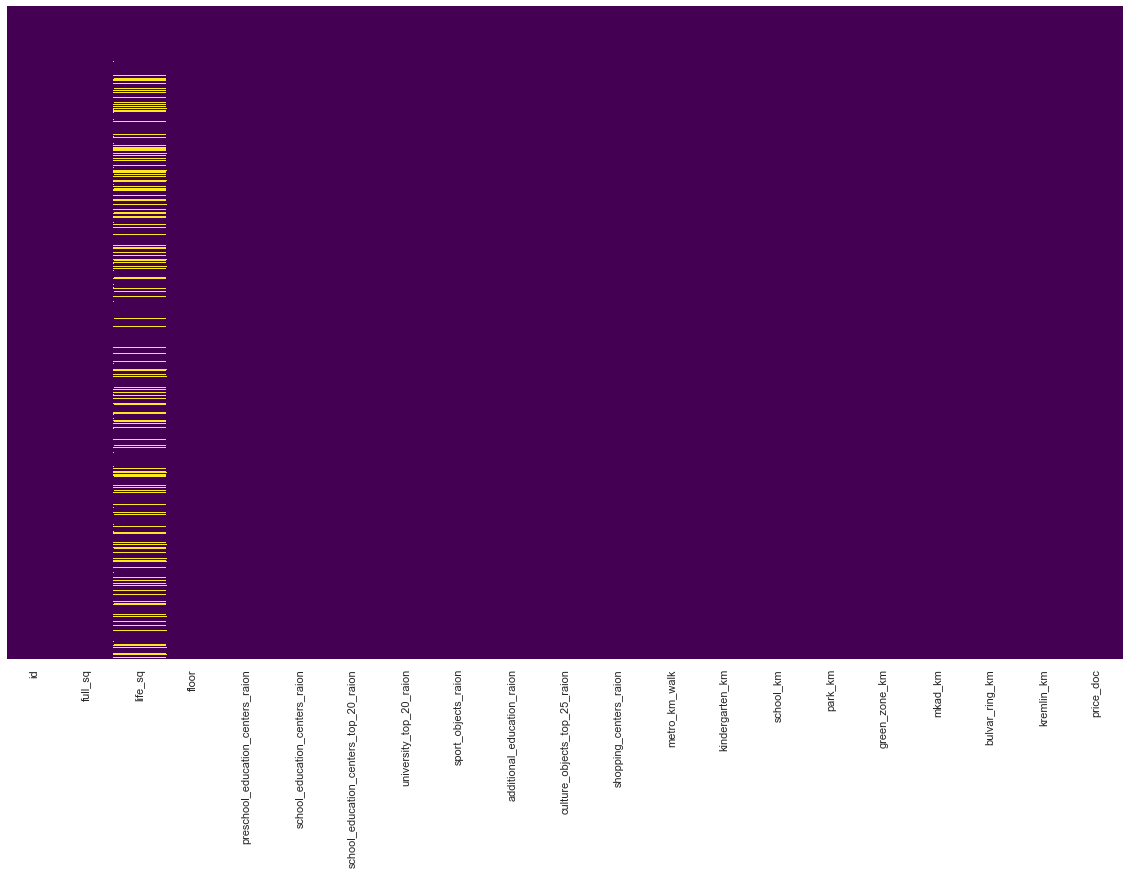

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [48]:
data.drop(['life_sq'], axis=1, inplace=True)

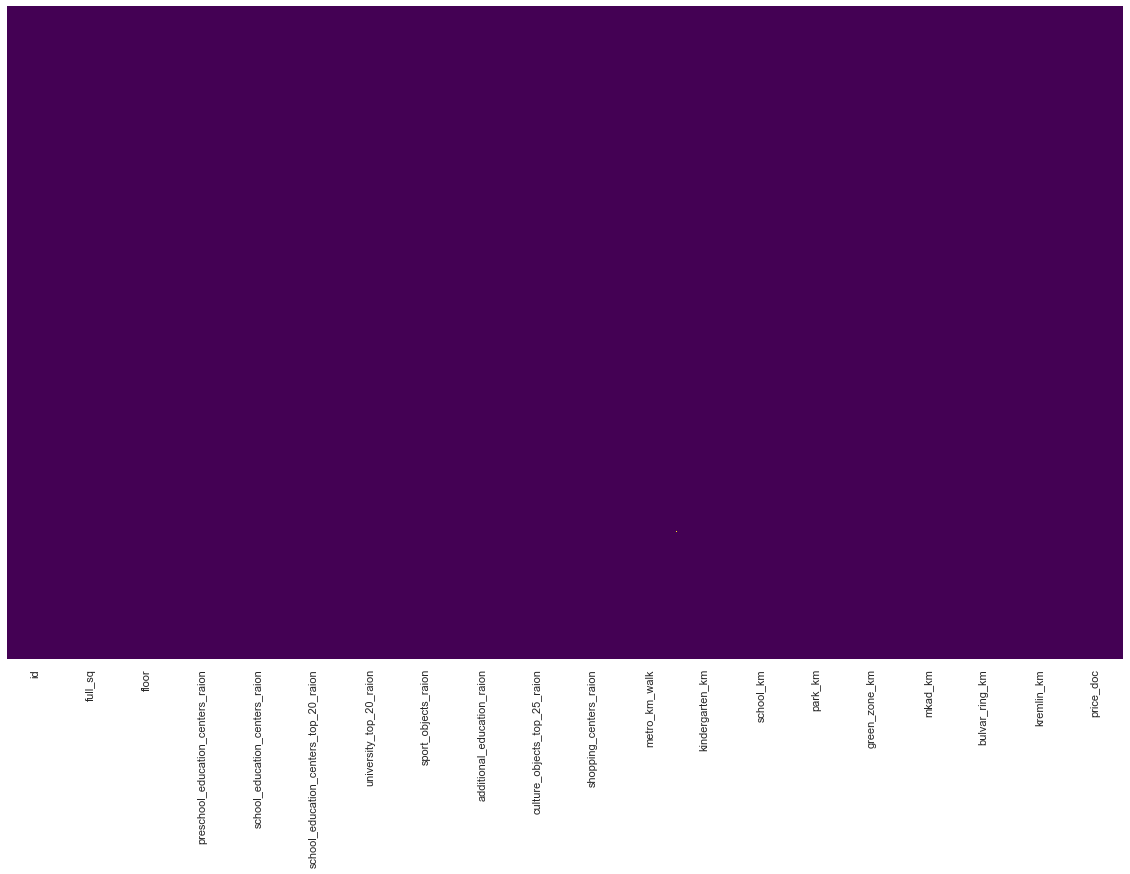

In [49]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [50]:
data.isnull().sum()

id                                         0
full_sq                                    0
floor                                    167
preschool_education_centers_raion          0
school_education_centers_raion             0
school_education_centers_top_20_raion      0
university_top_20_raion                    0
sport_objects_raion                        0
additional_education_raion                 0
culture_objects_top_25_raion               0
shopping_centers_raion                     0
metro_km_walk                             25
kindergarten_km                            0
school_km                                  0
park_km                                    0
green_zone_km                              0
mkad_km                                    0
bulvar_ring_km                             0
kremlin_km                                 0
price_doc                                  0
dtype: int64

In [51]:
data.dropna(inplace=True)
data.isnull().sum()

id                                       0
full_sq                                  0
floor                                    0
preschool_education_centers_raion        0
school_education_centers_raion           0
school_education_centers_top_20_raion    0
university_top_20_raion                  0
sport_objects_raion                      0
additional_education_raion               0
culture_objects_top_25_raion             0
shopping_centers_raion                   0
metro_km_walk                            0
kindergarten_km                          0
school_km                                0
park_km                                  0
green_zone_km                            0
mkad_km                                  0
bulvar_ring_km                           0
kremlin_km                               0
price_doc                                0
dtype: int64

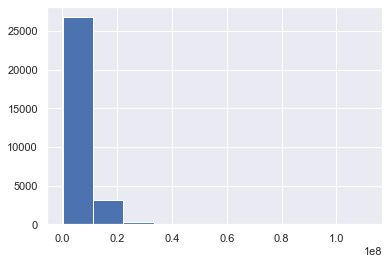

In [52]:
data.price_doc.hist()

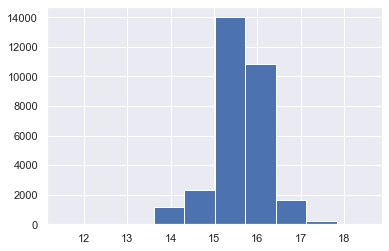

In [53]:
import numpy as np
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist()

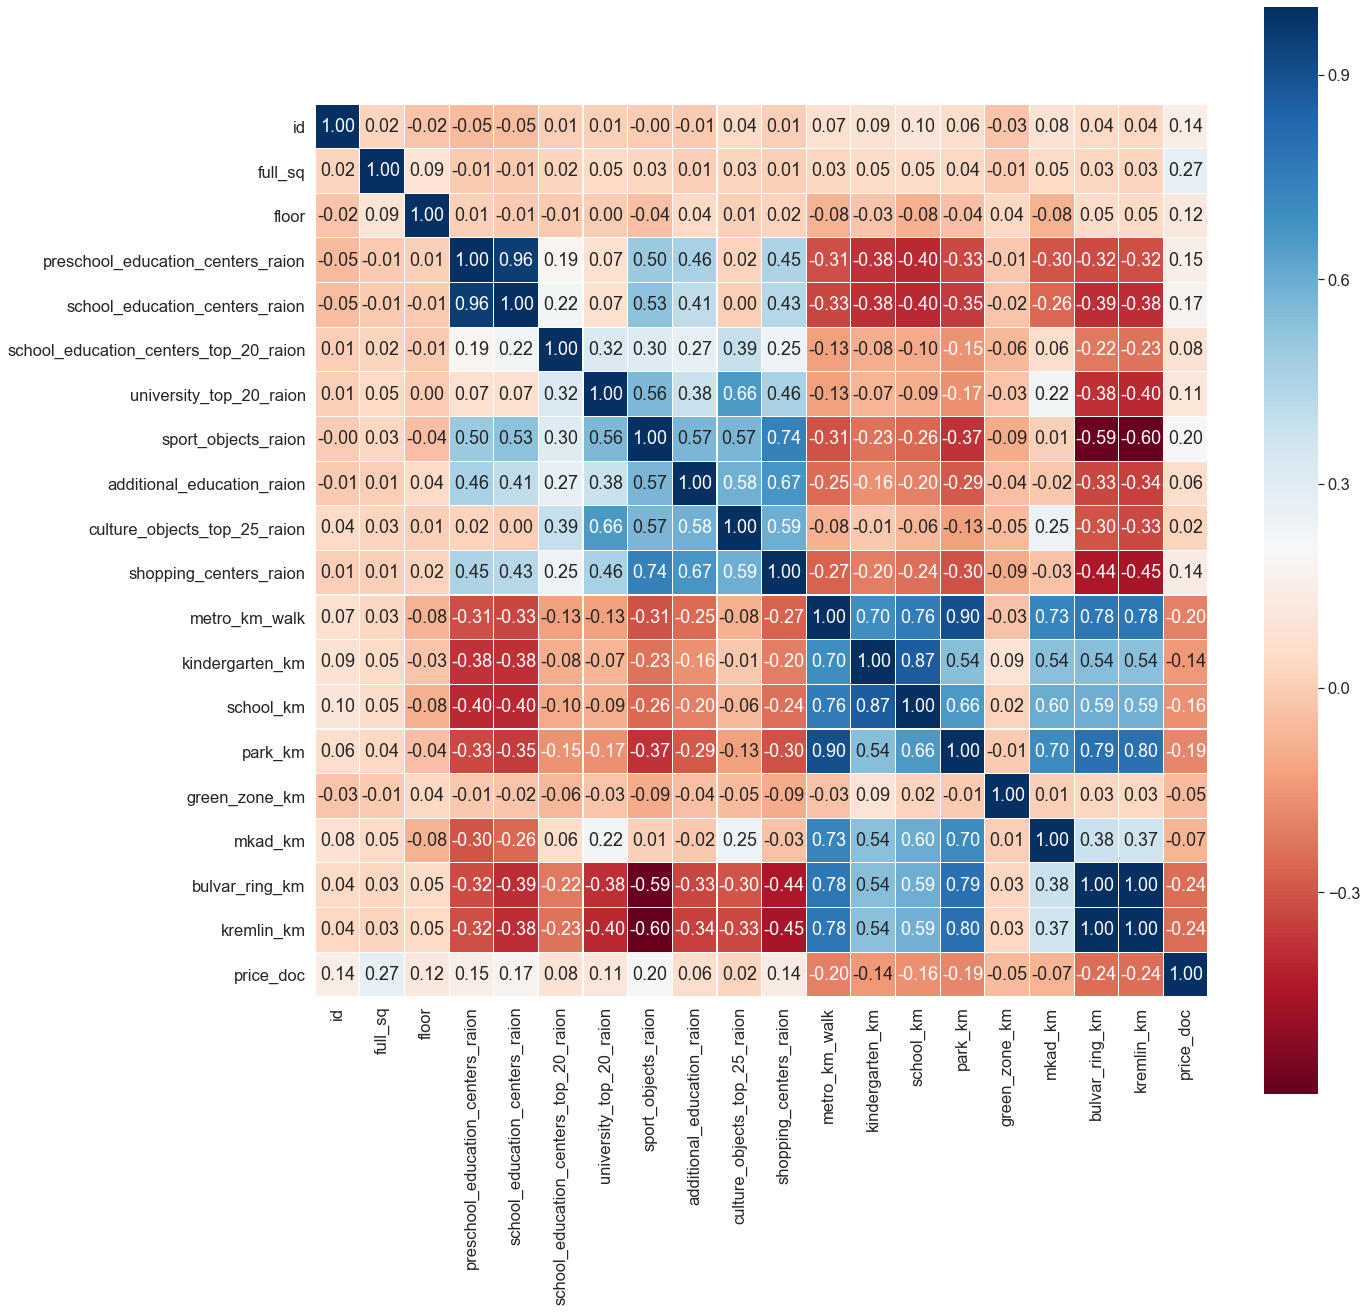

In [56]:
sns.set(font_scale=1.5)
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

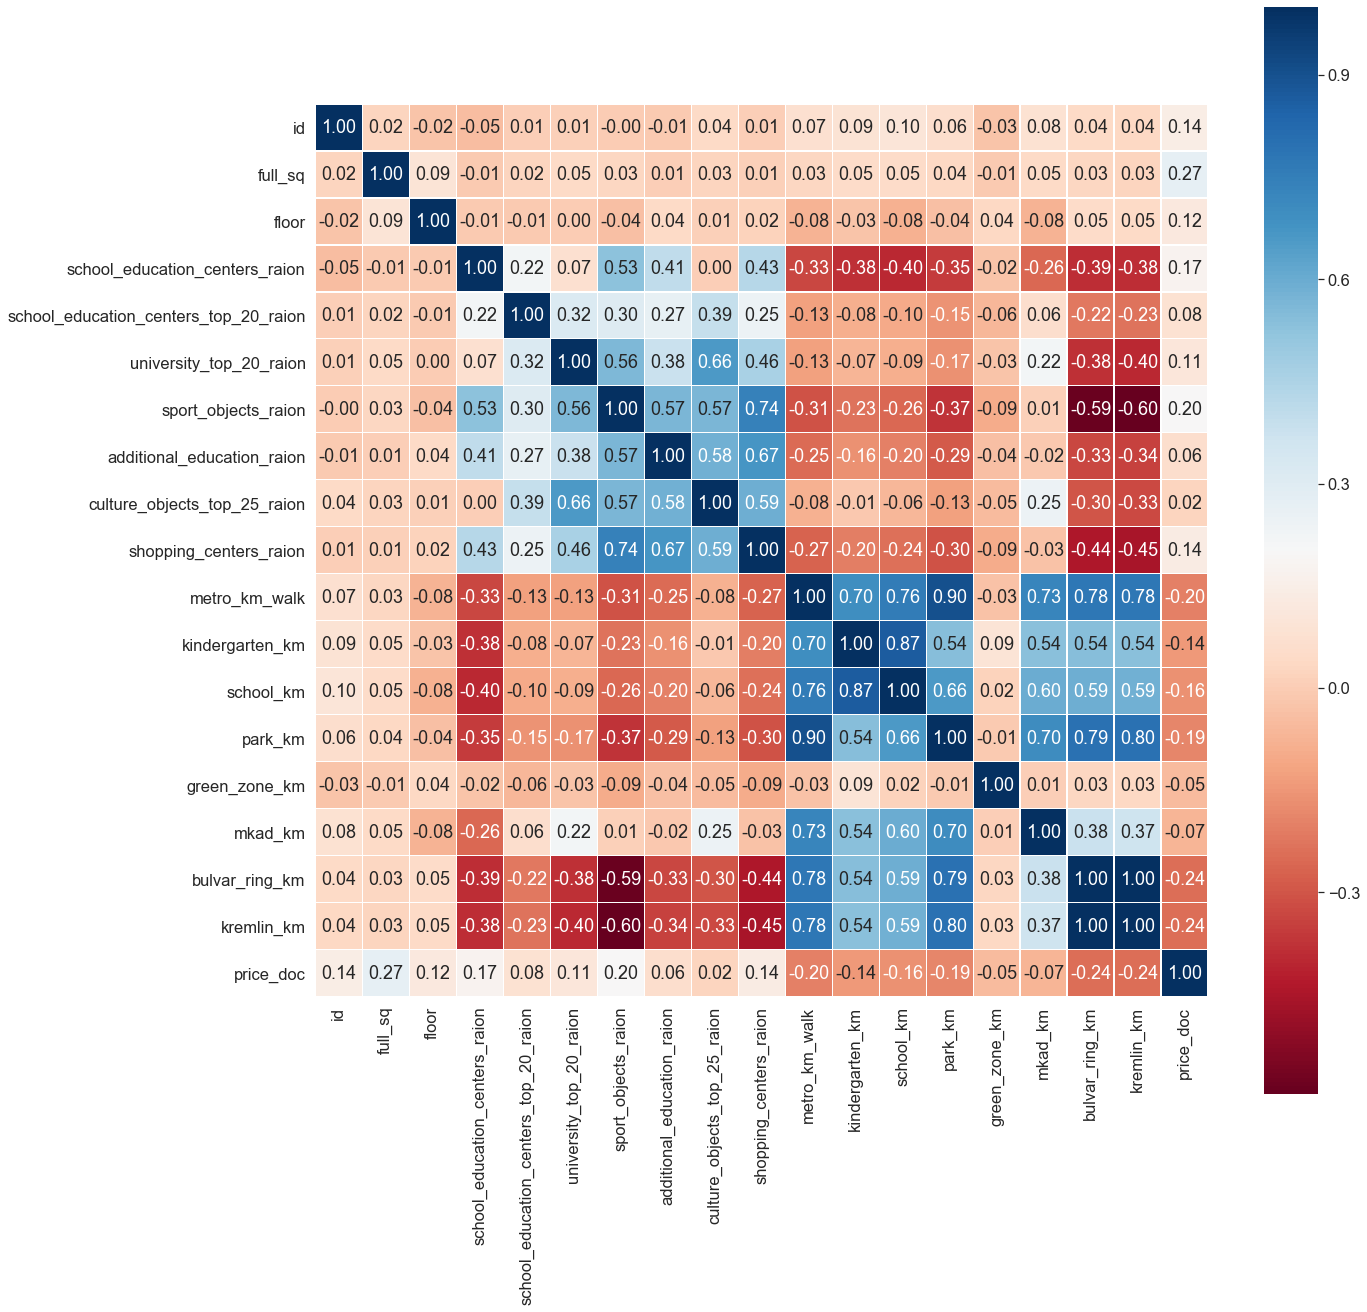

In [57]:
data.drop(['preschool_education_centers_raion'], axis=1, inplace=True)
sns.set(font_scale=1.5)
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

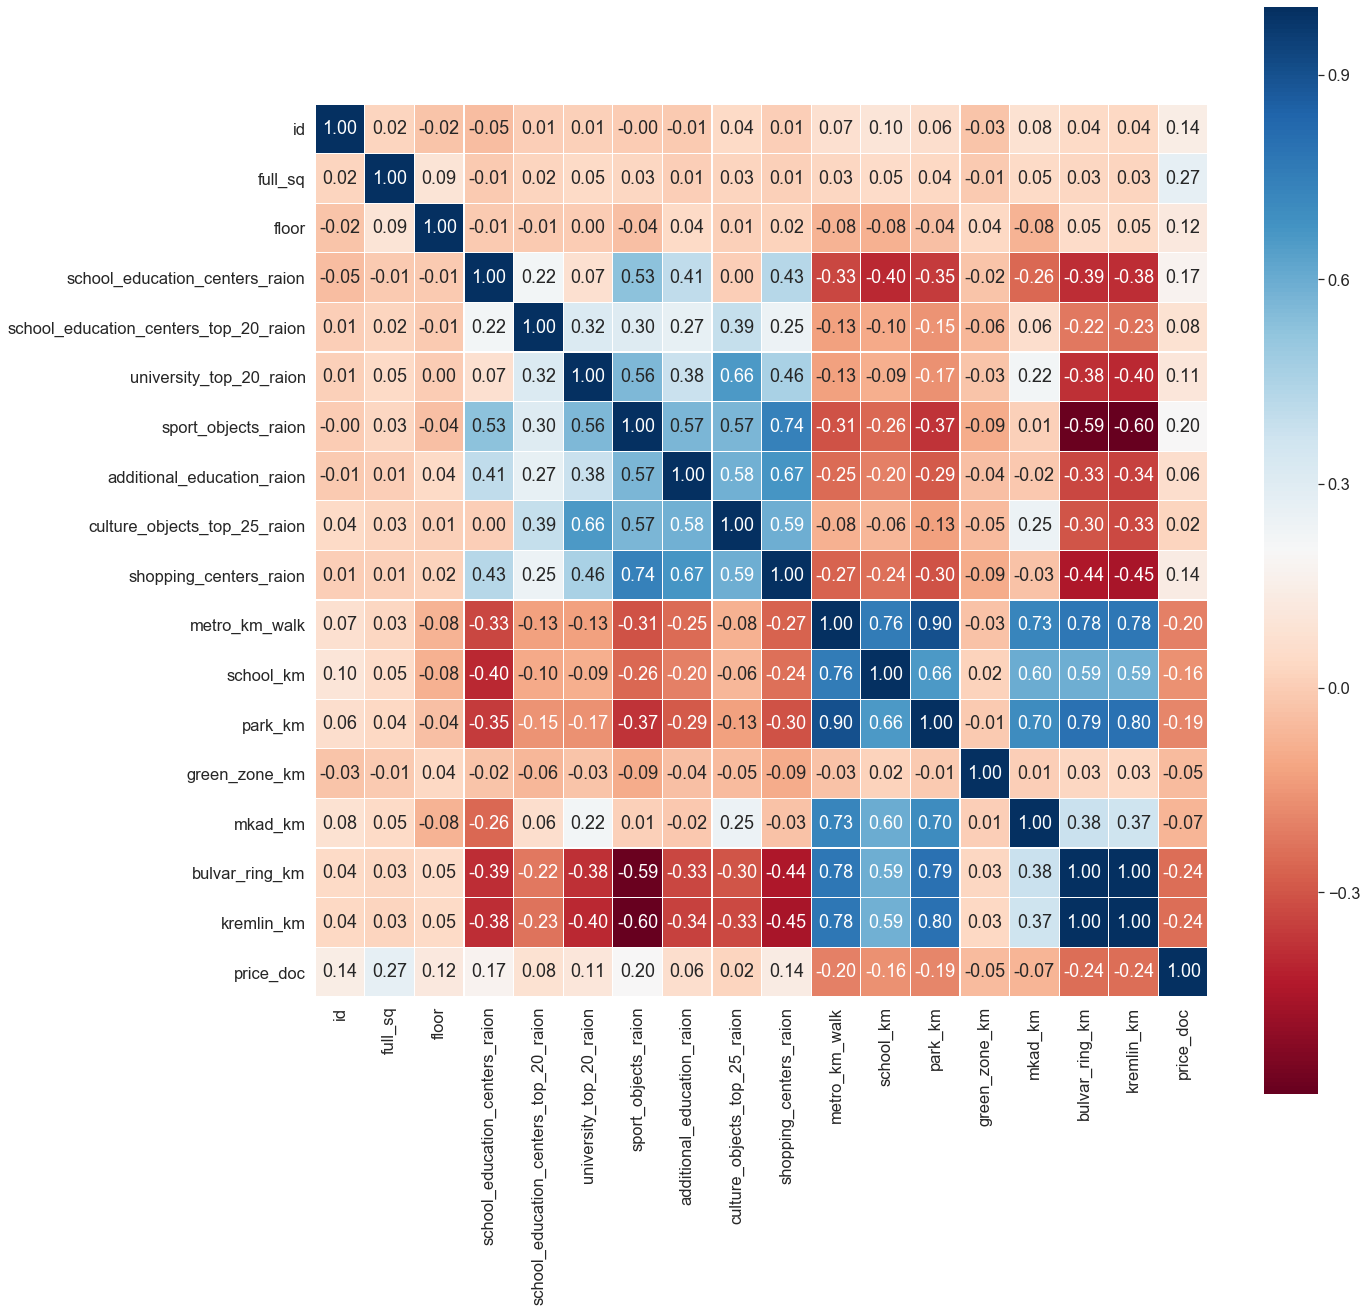

In [58]:
data.drop(['kindergarten_km'], axis=1, inplace=True)
sns.set(font_scale=1.5)
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

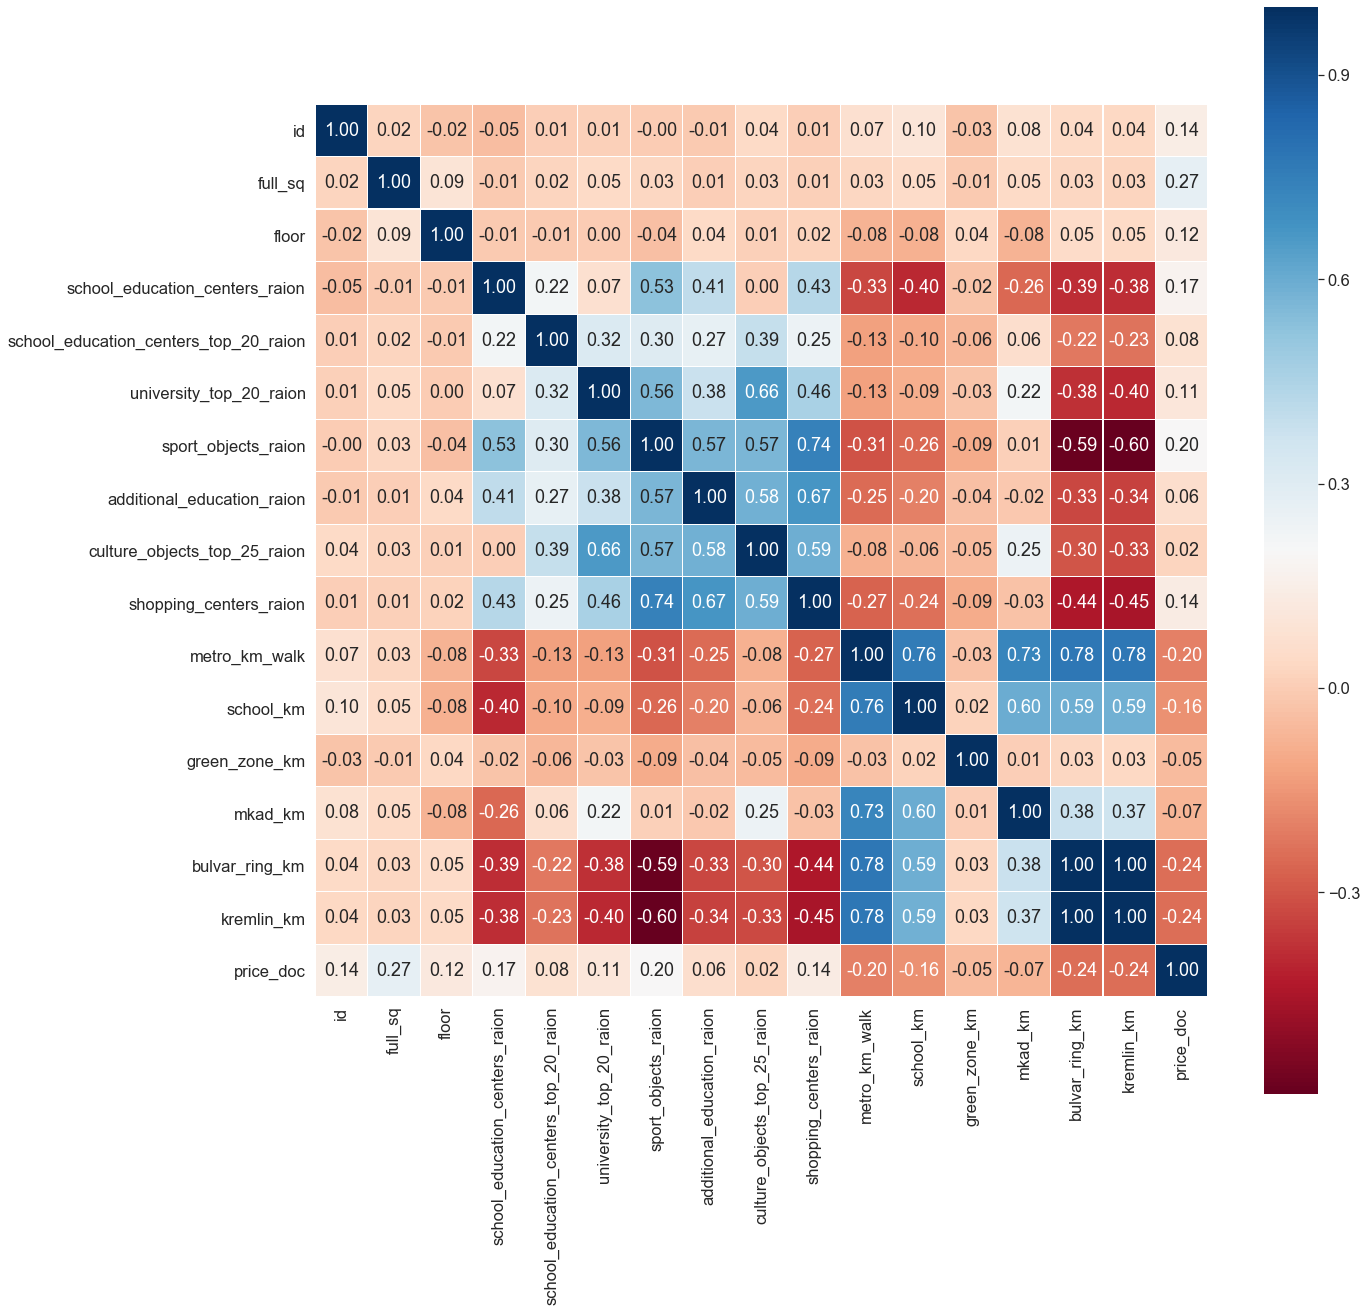

In [59]:
data.drop(['park_km'], axis=1, inplace=True)
sns.set(font_scale=1.5)
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

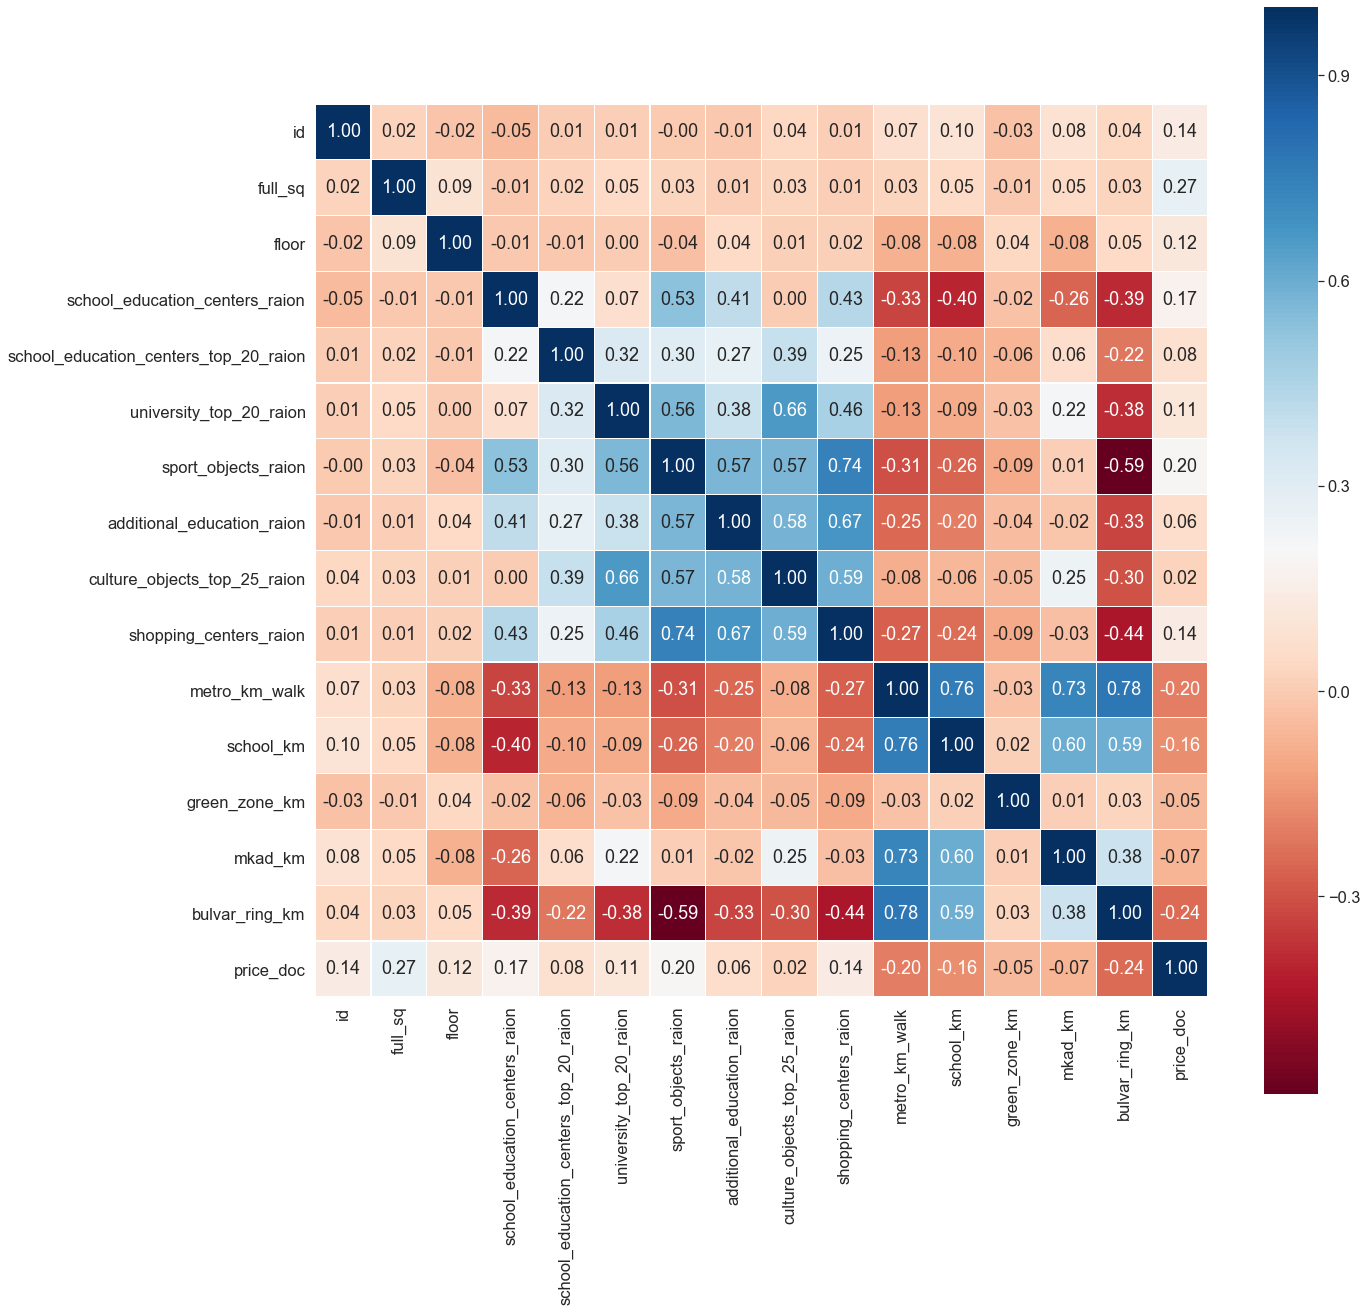

In [60]:
data.drop(['kremlin_km'], axis=1, inplace=True)
sns.set(font_scale=1.5)
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

In [80]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# X = data.loc[:, ~data.columns.isin(['price_doc','id'])]
# y = data.price_doc
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
# (X_train, y_train)
# scaler = MinMaxScaler()

# выбираем целевую переменную
y = data.price_doc
# выбираем признаки
X = data.iloc[:,1:-1]

# scaler = RobustScaler()
# data_scaled = scaler.fit_transform(data)
# X = data_scaled[:, :-1]
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# X = data[:, :-1]
# y = data[:, -1]
# X
# data_scaled = scaler.fit_transform(data)
# X = data_scaled[:, :-1]
# y = data_scaled[:, -1]

# делим данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# нормализуем признаки
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#Обозначаем, что наша модель - линейная регрессия
Model = LinearRegression() 
# обучаем модель
Model.fit(X_train,y_train)

# предсказываем целевые значения
y_pred = Model.predict(X_test)
# находим метрики, предварительно экспонируя целевую переменную
MSE = np.round(mse((np.exp(y_test) - 1), (np.exp(y_pred) - 1)), 0)
print(MSE)

16818684371715.0


In [70]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# scaler = MinMaxScaler()
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)
X = data_scaled[:, :-1]
y = data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
np.round(mse(np.round(np.exp(y_test)), np.round(np.exp(y_pred))), 2)

TypeError: '(slice(None, None, None), -1)' is an invalid key